<a href="https://colab.research.google.com/github/icosahedr/Numerical-Methods/blob/main/Assignment_1/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
def scatter_plot(data, col=None):
    from mpl_toolkits.mplot3d import Axes3D 
    %matplotlib inline
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:,0], data[:,1], data[:,2], s = 0.5, color=col)
    plt.show()

In [ ]:
N = 10000
K = 3
d = 3
L = 10

In [ ]:
# Generate some data
np.random.seed(42)
mu_true = np.random.uniform(-L, L, size = (K, d))
data = np.random.normal(mu_true, size = (N, K, d))
data = np.vstack(data)
np.random.shuffle(data)

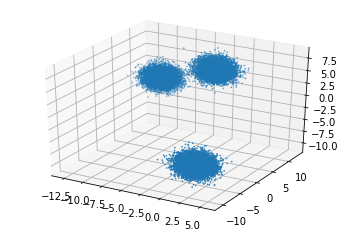

In [ ]:
if d == 3:
    scatter_plot(data, None)

In [ ]:
mu = data[np.random.choice(range(data.shape[0]), K, replace=False)]
c = np.random.randint(low=0, high=K-1, size=data.shape[0])
c1 = c

In [ ]:
def dist_i(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    dist = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        dist[i] = np.sum((x[i] - mu[i])**2)
    return dist
def dist_ij(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    dist = np.zeros((x.shape[0], mu.shape[0]))
    for i in range(x.shape[0]):
        for j in range(mu.shape[0]):
            dist[i, j] += np.sum((x[i] - mu[j])**2)
    return dist

In [ ]:
def k_means(data, mu, c, K):
  ss_list = []
  for n in range(10):
      c =  np.argmin(dist_ij(data, mu), axis = 1)    
      ss = np.mean(dist_i(data, mu[c]))
      ss_list.append(ss)    
      for i in range(K):
          cluster_members = data[c == i]
          cluster_members = cluster_members.mean(axis = 0)
          mu[i] = cluster_members
  return ss_list, c


def k_means_improved(data, mu, c, K):
  ss_list = []
  for n in range(10):
      c =  np.argmin(dist_ij_improved(data, mu), axis = 1)    
      ss = np.mean(dist_i_improved(data, mu[c]))
      ss_list.append(ss)    
      for i in range(K):
          cluster_members = data[c == i]
          cluster_members = cluster_members.mean(axis = 0)
          mu[i] = cluster_members
  return ss_list, c

In [ ]:
ss_list, c = k_means(data, mu, c1, K)

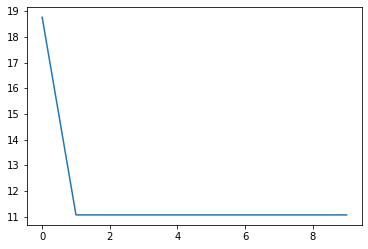

In [ ]:
plt.plot(ss_list)

In [ ]:
colors = np.array([plt.cm.cool(i/(K-1)) for i in range(K)])
# print(colors)

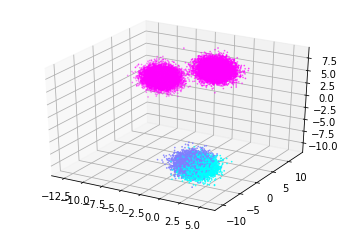

In [ ]:
if d == 3:
    scatter_plot(data, colors[c])

### Impoved dist:

In [ ]:
def dist_i_improved(x, mu):
    # x: N datapoints, mu: N cluster centers
    # returns: D_{i}, squared distances from x[i] to mu[i]
    # dist = np.zeros(x.shape[0])
    return np.sum(np.power(x - mu, 2), axis = 1)
def dist_ij_improved(x, mu):
    # x: N datapoints, mu: K cluster centers
    # returns: D_{ij}, squared distances from x[i] to mu[j]
    # dist = np.zeros((x.shape[0], mu.shape[0]))
    return np.sum(np.power(x, 2), axis = 1, keepdims=True) - 2 * x @ mu.T + np.sum(np.power(mu, 2), axis = 1)

In [ ]:
# print(dist_i(data, mu[c]))
# print(dist_i_improved(data, mu[c]))
# print(dist_ij(data, mu))
# print(dist_ij_improved(data, mu))
assert np.allclose(dist_ij_improved(data, mu), dist_ij(data, mu), atol=1e-6)
assert np.allclose(dist_i_improved(data, mu[c1]), dist_i(data, mu[c1]), atol=1e-6)

In [ ]:
%timeit k_means(data, mu, c1, K)

9.02 s ± 428 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit k_means_improved(data, mu, c1, K)

129 ms ± 2 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
1100/128

8.59375

```
k_means: 11.1 s ± 984 ms

k_means_improved: 128 ms ± 1.84 ms

Speed up by 8.59 times
```



In [ ]:
%timeit dist_i_improved(data, mu[c1])

2.56 ms ± 37.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit dist_i(data, mu[c1])

215 ms ± 9.17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit dist_ij_improved(data, mu)

4.55 ms ± 109 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit dist_ij(data, mu)

671 ms ± 14.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
